In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataFrame = pd.read_excel("websites.xlsx")
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [5]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis=1).values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.28)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model1 = models.Sequential()

#kaç tane sütun (x özelliği) varsa ilk katmanda o kadar nörön olması önerilir
model1.add(layers.Dense(30,activation="relu"))

#çıkış katmanı nöron sayısı ile ilk katmandaki nöron sayısı arasında olması önerilir 
model1.add(layers.Dense(15,activation="relu"))
model1.add(layers.Dense(15,activation="relu"))

#binary classification ve 0-1 arası çıktılar için sigmoid fonksiyonu
model1.add(layers.Dense(1,activation="sigmoid"))

model1.compile(optimizer="adam",loss="binary_crossentropy")

In [22]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=700)

Epoch 1/700
13/13 [==============================] - 0s 18ms/step - loss: 0.7162 - val_loss: 0.6881
Epoch 2/700
13/13 [==============================] - 0s 6ms/step - loss: 0.6853 - val_loss: 0.6620
Epoch 3/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6597 - val_loss: 0.6368
Epoch 4/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6335 - val_loss: 0.6096
Epoch 5/700
13/13 [==============================] - 0s 6ms/step - loss: 0.6024 - val_loss: 0.5756
Epoch 6/700
13/13 [==============================] - 0s 5ms/step - loss: 0.5628 - val_loss: 0.5271
Epoch 7/700
13/13 [==============================] - 0s 5ms/step - loss: 0.5085 - val_loss: 0.4746
Epoch 8/700
13/13 [==============================] - 0s 5ms/step - loss: 0.4491 - val_loss: 0.4195
Epoch 9/700
13/13 [==============================] - 0s 5ms/step - loss: 0.3942 - val_loss: 0.3716
Epoch 10/700
13/13 [==============================] - 0s 5ms/step - loss: 0.3458 - val_loss: 0.3327
Epoch 11

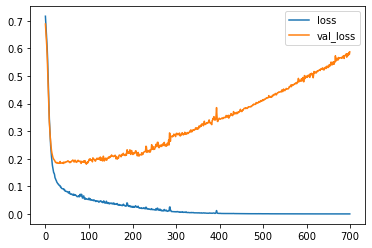

In [23]:
loss_df = model1.history.history

loss_train = loss_df["loss"]
loss_train = np.array(loss_train)
loss_test = loss_df["val_loss"]
loss_test = np.array(loss_test)

axis = range(0,700)
plt.plot(axis,loss_train, label="loss")
plt.plot(axis,loss_test, label="val_loss")
plt.legend()

# overfitting aşırı uydurma durumu (epoch fazla geldi)

In [25]:
# modeli tekrar oluşturma

model2 = models.Sequential()

model2.add(layers.Dense(30,activation="relu"))
model2.add(layers.Dense(15,activation="relu"))
model2.add(layers.Dense(15,activation="relu"))
model2.add(layers.Dense(1,activation="sigmoid"))

model2.compile(optimizer="adam",loss="binary_crossentropy")

In [26]:
# Early Stopping (Erken Durdurma) ayarlı eğitme
from tensorflow.keras import callbacks

stopping = callbacks.EarlyStopping(monitor="val_loss",mode="min",patience=25,verbose=1)
# val_loss'u minimum olacak şekilde takip et, 25 ayarında erken durdurma yap

model2.fit(x_train, y_train, validation_data=(x_test,y_test),
          epochs=700, callbacks=[stopping])

Epoch 1/700
13/13 [==============================] - 0s 17ms/step - loss: 0.6834 - val_loss: 0.6714
Epoch 2/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6656 - val_loss: 0.6524
Epoch 3/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6448 - val_loss: 0.6299
Epoch 4/700
13/13 [==============================] - 0s 4ms/step - loss: 0.6181 - val_loss: 0.6006
Epoch 5/700
13/13 [==============================] - 0s 6ms/step - loss: 0.5867 - val_loss: 0.5656
Epoch 6/700
13/13 [==============================] - 0s 6ms/step - loss: 0.5497 - val_loss: 0.5263
Epoch 7/700
13/13 [==============================] - 0s 4ms/step - loss: 0.5074 - val_loss: 0.4817
Epoch 8/700
13/13 [==============================] - 0s 4ms/step - loss: 0.4621 - val_loss: 0.4341
Epoch 9/700
13/13 [==============================] - 0s 4ms/step - loss: 0.4144 - val_loss: 0.3860
Epoch 10/700
13/13 [==============================] - 0s 5ms/step - loss: 0.3693 - val_loss: 0.3443
Epoch 11

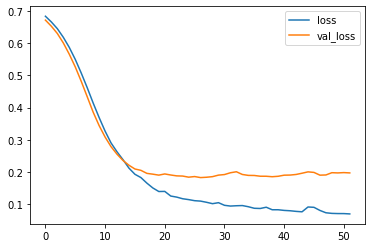

In [28]:
loss_df = model2.history.history

loss_train = loss_df["loss"]
loss_train = np.array(loss_train)
loss_test = loss_df["val_loss"]
loss_test = np.array(loss_test)

axis = range(0,52)  # 52. epoch'da erken durdurma
plt.plot(axis,loss_train, label="loss")
plt.plot(axis,loss_test, label="val_loss")
plt.legend()

In [30]:
# Dropout (fazla nöronların düşürülmesi - kısa süreli unutma)
# modeli tekrar oluşturma

model3 = models.Sequential()

model3.add(layers.Dense(30,activation="relu"))
model3.add(layers.Dropout(0.4))   #rastgele nöronları düşürmeyi dene

model3.add(layers.Dense(15,activation="relu"))
model3.add(layers.Dropout(0.4))

model3.add(layers.Dense(15,activation="relu"))
model3.add(layers.Dropout(0.4))

model3.add(layers.Dense(1,activation="sigmoid"))

model3.compile(optimizer="adam",loss="binary_crossentropy")

In [31]:
model3.fit(x_train, y_train, validation_data=(x_test,y_test),
          epochs=700, callbacks=[stopping])

Epoch 1/700
13/13 [==============================] - 0s 20ms/step - loss: 0.6933 - val_loss: 0.6890
Epoch 2/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6897 - val_loss: 0.6841
Epoch 3/700
13/13 [==============================] - 0s 6ms/step - loss: 0.6894 - val_loss: 0.6781
Epoch 4/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6856 - val_loss: 0.6731
Epoch 5/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6739 - val_loss: 0.6653
Epoch 6/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6696 - val_loss: 0.6546
Epoch 7/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6541 - val_loss: 0.6431
Epoch 8/700
13/13 [==============================] - 0s 4ms/step - loss: 0.6540 - val_loss: 0.6311
Epoch 9/700
13/13 [==============================] - 0s 5ms/step - loss: 0.6426 - val_loss: 0.6169
Epoch 10/700
13/13 [==============================] - 0s 4ms/step - loss: 0.6183 - val_loss: 0.5983
Epoch 11

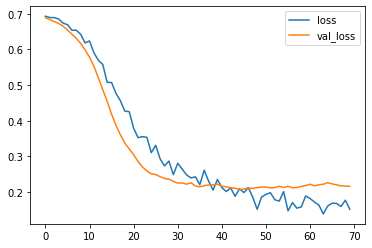

In [32]:
loss_df = model3.history.history

loss_train = loss_df["loss"]
loss_train = np.array(loss_train)
loss_test = loss_df["val_loss"]
loss_test = np.array(loss_test)

axis = range(0,70)  # 70. epoch
plt.plot(axis,loss_train, label="loss")
plt.plot(axis,loss_test, label="val_loss")
plt.legend()

In [36]:
# sınıflandırma sonuçlarını tahmin et

tahminler = model3.predict_classes(x_test)
tahminler

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [37]:
sayı = tahminler.shape[0]
tahminler = pd.Series(tahminler.reshape(sayı,))

resultFrame = pd.DataFrame(y_test,columns=["Gerçek Tür"])
resultFrame["Tahmin"] = tahminler
resultFrame

,Gerçek Tür,Tahmin
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
149,0,0
150,0,0
151,0,0
152,1,1


In [40]:
# sınıflandırma sonuçlarını değerlendirme

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,tahminler))
# %93 accuracy score

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        95
           1       0.91      0.90      0.91        59

    accuracy                           0.93       154
   macro avg       0.93      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



In [41]:
print(confusion_matrix(y_test,tahminler))

[[90  5]
 [ 6 53]]


In [42]:
# 0'lar (virüs siteleri tahmininde) 90 doğru, 5 yanlış / %94 doğruluk
# 1'lar (güvenli siteleri tahmininde) 53 doğru, 6 yanlış / %91 doğruluk